<a href="https://colab.research.google.com/github/ShashankUparwat/US-Accidents-2016-2021/blob/main/US_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

## Data Download

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
from opendatasets.utils.kaggle_direct import download_kaggle_dataset
download_kaggle_dataset = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv'

In [ ]:
od.download(download_kaggle_dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shashankuparwat
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 101MB/s]


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning
- Load the file using Pandas
- Study the the data
-Fix any missing values or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

#### Number of Numeric Columns

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

len(numeric_df.columns)

#### Percentage of Missing Values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Exploratory Analysis and Visualisation

####Columns to Analyse
- City
- Start Time
- Start Lat
- Start Long

##City

In [ ]:
cities = df.City.unique()  
len(cities)

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

In [ ]:
cities_by_accident[:20]

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
less_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(high_accident_cities) / len(cities)

In [ ]:
sns.displot(high_accident_cities)

In [ ]:
sns.displot(less_accident_cities)

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

##Start Time

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


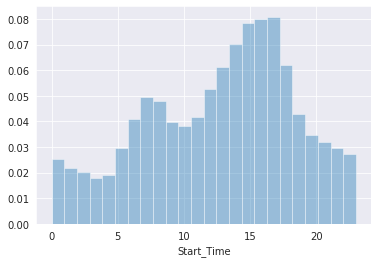

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 3 pm to 7 pm (People returning from work)

- Next highest percentage of accidents occur between 6 am to 9 am

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


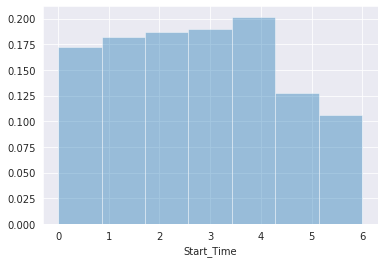

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekend as on weekdays?

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


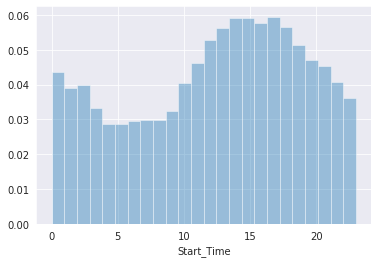

In [ ]:
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


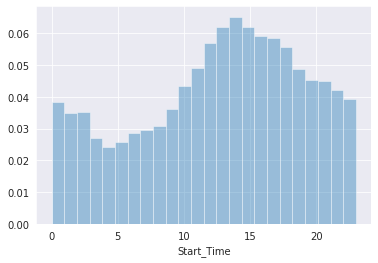

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


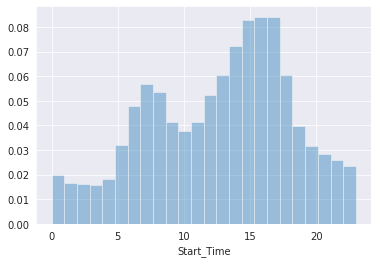

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On weekdays, highest number of accidents happen between 12 pm to 6 pm

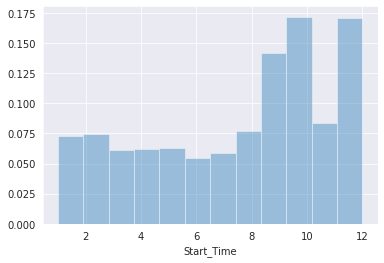

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

## Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

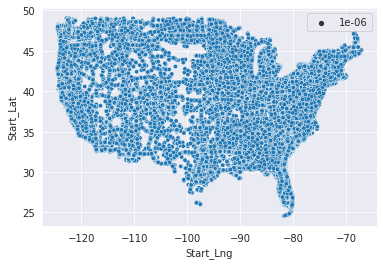

In [ ]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat, size=0.000001)

#Summary and Conclusion

###Insights
- No data from New York
- The number of accidents per city decreases exponentially
- Less then 5% of cities have more than 1000 yearly accidents
- Over 1110 cities have reported just one accident fopr the entire tme period 
- Some of the data from 2016 and maybe even 2017 is missing
- East Coast and West Coast have have highest number of accidents

## Areas for Future work

- Accidents occuring in particular Temparture range and weather conditions

- Heatmap

- Where did the accidents occur? Bump, Crossing , etc